# Project Title :  

# **Blockchain-Powered Fraud Detection and Claims Processing with Machine Learning in Insurance.**

### Project Introduction:

Insurance as a body deals with the financial aspect of the business by a factor of risk analysis and mitigation process. The insurer will always strive to have the immunity of its assets by factors of security and claims. This company make a profit of investing the insured assets earns profits from it before the risk insured against by the client is experienced. 

The insurance take (policy) lapse after a specific period out which the company would now have maximized its profits. Since this business is carried out in a digital ecosystem, the process is subjected to threats such as security, fraud and other cyber-attacks. Upon issue of the policy, the beneficiary has to wait for the policy to mature to claim the benefits. It is during the claim process that the fraud activities are introduced into the business and the company experiences losses out of it.

The process of critically assessing the claim process and evaluating whether it is fraud or not requires top-notch security to ensure the company does not undergo losses. Blockchain technology has proven to have an efficient distributed security with digital signatures that make such threats difficult to occur. This is the only way the forms can remain relevant and immune.



#### Project Objectives:

With the utilization of Blockchain technology and machine learning techniques for fraud detection, this project seeks to provide an efficient and reliable solution to not only the insurance firms but also the financial institutions. The project acknowledges data privacy as a principle and targets to source its dataset from the Kaggle repository. This by virtue is to follow the ethical project execution.
1. Enhance Fraud Detection Capabilities: The project aims to leverage blockchain technology and machine learning algorithms to improve the insurance industry's ability to detect and prevent fraudulent claims. By developing sophisticated fraud detection models, the project seeks to reduce financial losses for insurance companies and enhance trust in the ecosystem.
2. Streamline Claims Processing: The project seeks to streamline the insurance claims process by implementing smart contracts on the blockchain. By automating the claims process and ensuring transparency and accuracy, the project aims to expedite claims processing, leading to quicker payouts for policyholders and increased efficiency for insurers.
3. Enhance Data Privacy and Security: By utilizing blockchain technology's secure and transparent ledger, the project aims to enhance data privacy and security in the insurance industry. By implementing decentralized identity verification systems and securely storing customer data, the project aims to protect sensitive information from cyber threats and ensure the integrity of the insurance ecosystem.


### Project Questions :
1.	Can fraudulent transaction be predicted before they occur. 
2.	How cam machine learning approaches be employed to secure claim processes in insurances.
3.	To what extent can blockchain technology be considered secured for secured claim processes and financials in insurance?
4.	What are the best approaches to risk mitigation in financial sectors?
5.	What percentage gain can firms benefit monetarily from a secured claim process and risk analysis?


In [1]:
# Importing the required Packages Into The Kernel
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Getting the dataset
claims_data = pd.read_csv('data/insurance_claims.csv')
claims_data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Data Understanding

In [4]:
# Data Description
claims_data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [5]:
# Data Stracture, shape
claims_data.shape

(1000, 40)

<Axes: >

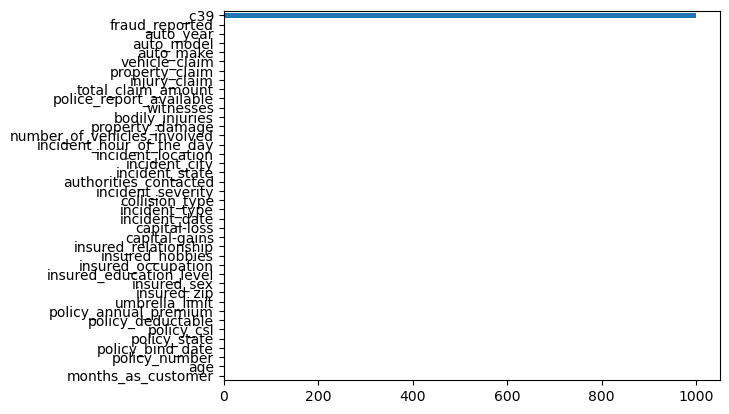

In [6]:
# Data Missing Elements
claims_data.isna().sum().plot(kind='barh')
# All data records for the column c39 is missing. , we should remove this column,
# There are also less authorities contacted f=before claim is perfomed. , the is  a significant percentage of missing data .


In [7]:
# Understanding the schema data unique records.
claims_data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

<Axes: >

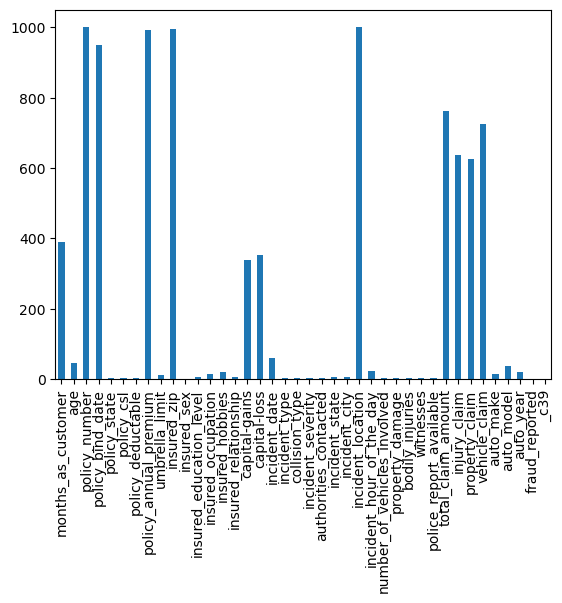

In [8]:

claims_data.nunique().plot(kind = 'bar')
# for distinct elements, major distinct elements might not useful for categorical elements. 
# the model has less to learn from , for instance, policy number can be removed as weell.

N    0.753
Y    0.247
Name: fraud_reported, dtype: float64


<Axes: >

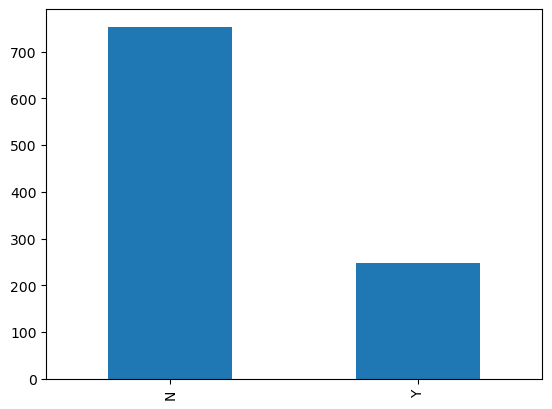

In [9]:
print(claims_data['fraud_reported'].value_counts()/len(claims_data['fraud_reported']))
claims_data['fraud_reported'].value_counts().plot(kind ='bar')
# For Out of the reported cases claims that were initated, 24 % of them were fradulent while 75 were not. The insight from this is that, in every 10 randomly selected 
# cases, there is a 2 % chance that 2  of the records woud be fradulent cases.

<Axes: >

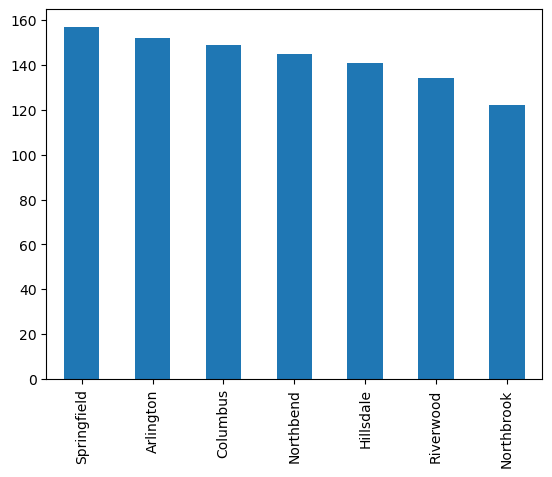

In [10]:
claims_data['incident_city'].value_counts().plot(kind = 'bar')
# The question of wheter specific cities are likely affected with fraud cases as compared with others
# comes with the cost of understanding the fradulent cases by the stated cities.
# Analysis uncovered that there is a major repported cases on springfield region ,
# it was closely followed by the Arington which closely followed by columbus



### Data Cleaning and Processing

In [11]:
# Replace '?'to a nun in numpy 
claims_data.replace('?', np.nan, inplace=True)
# Date dataprocessing 
# Convert date columns to datetime
claims_data['policy_bind_date'] = pd.to_datetime(claims_data['policy_bind_date'], errors='coerce')
claims_data['incident_date'] = pd.to_datetime(claims_data['incident_date'], errors='coerce')
claims_data[['policy_bind_date','incident_date']].head().T

,0,1,2,3,4
policy_bind_date,2014-10-17,2006-06-27,2000-09-06,1990-05-25,2014-06-06
incident_date,2015-01-25,2015-01-21,2015-02-22,2015-01-10,2015-02-17


### Data Wrangling

In [12]:
# Getting the most year of incidence , month and dates
claims_data['incident_year'] = claims_data['incident_date'].dt.year
claims_data['incident_month'] = claims_data['incident_date'].dt.month
claims_data['incident_day'] = claims_data['incident_date'].dt.day
claims_data[['incident_year','incident_month','incident_day']].head().T


,0,1,2,3,4
incident_year,2015,2015,2015,2015,2015
incident_month,1,1,2,1,2
incident_day,25,21,22,10,17


In [13]:
# Age Category Binning
bins = [0, 18, 30, 45, 60, 100]
labels = ['Children', 'Young Adults', 'Adults', 'Middle-aged Adults', 'Senior Adults']
claims_data['age_category'] = pd.cut(claims_data['age'], bins=bins, labels=labels, right=False)


### Categorical Data Processing

In [14]:
def process_dataset_types(dataset):
    categorical_columns = [
        'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
        'insured_occupation', 'incident_type', 'collision_type',
        'incident_severity', 'authorities_contacted', 'incident_state',
        'property_damage', 'police_report_available', 'auto_make', 'auto_model',
        'fraud_reported'
    ]
    for col in categorical_columns:
        dataset[col] = dataset[col].astype('category')
    # Handle missing values: fill with mode for categorical and mean for numerical
    for col in dataset.columns:
        if dataset[col].dtype == 'category':
            dataset[col].fillna(dataset[col].mode()[0], inplace=True)
        elif dataset[col].dtype in ['int64', 'float64']:
            dataset[col].fillna(dataset[col].mean(), inplace=True)
    return dataset
display(process_dataset_types(claims_data).head(3))

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39,incident_year,incident_month,incident_day,age_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,52080,Saab,92x,2004,Y,NaN,2015,1,25,Middle-aged Adults
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,3510,Mercedes,E400,2007,Y,NaN,2015,1,21,Adults
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,23100,Dodge,RAM,2007,N,NaN,2015,2,22,Young Adults


### Univariate Analysis

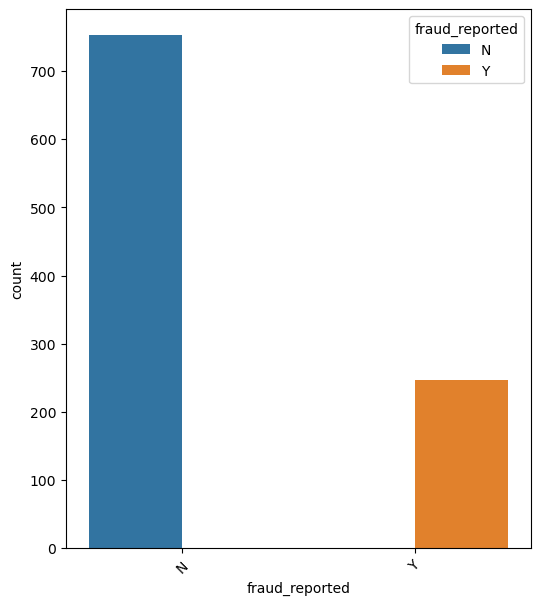

In [15]:
f, ax = plt.subplots(figsize=(6, 7))
sns.countplot(x='fraud_reported',hue = 'fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Most cases on the dataset are fradulent cases as can be observed. 

<Axes: >

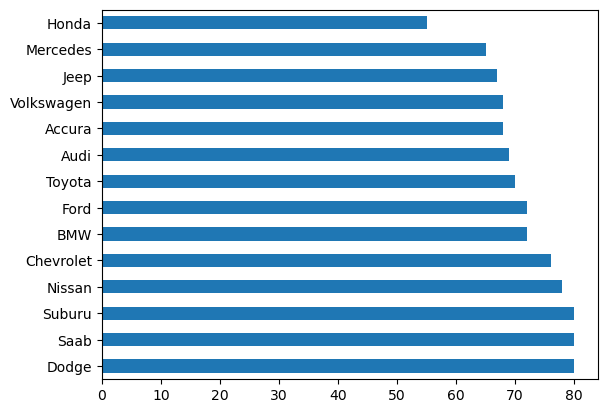

In [16]:
claims_data['auto_make'].value_counts().plot(kind='barh')

<Axes: >

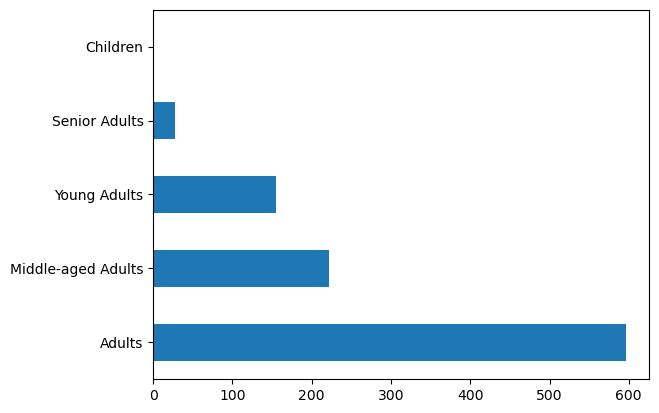

In [17]:
claims_data['age_category'].value_counts().plot(kind='barh')
# Children are benneficiaries, they are unlikely to commit fraud cases.

<Axes: ylabel='police_report_available'>

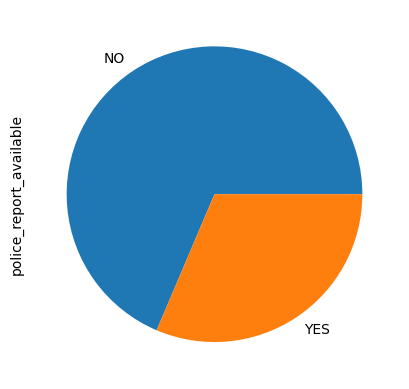

In [18]:
claims_data['police_report_available'].value_counts().plot(kind = 'pie')

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<Axes: >

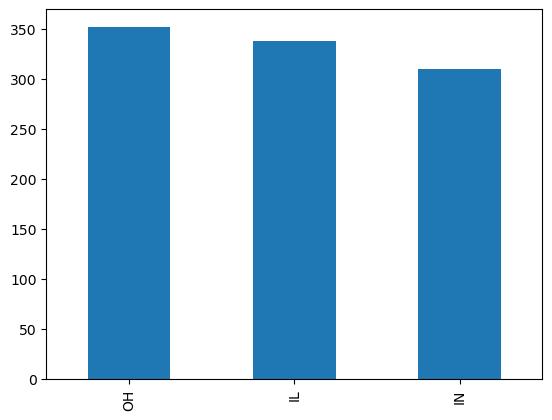

In [19]:
# What are some of he different Policy Status
print(claims_data['policy_state'].value_counts())
claims_data['policy_state'].value_counts().plot(kind='bar')

<Axes: ylabel='Density'>

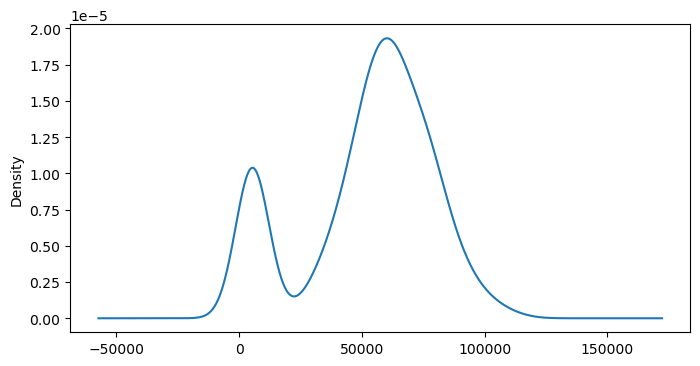

In [20]:
numerical_cols = ["total_claim_amount","injury_claim","property_claim","vehicle_claim"]
plt.figure(figsize=(8, 4))
claims_data["total_claim_amount"].plot(kind='kde')

<Axes: ylabel='Density'>

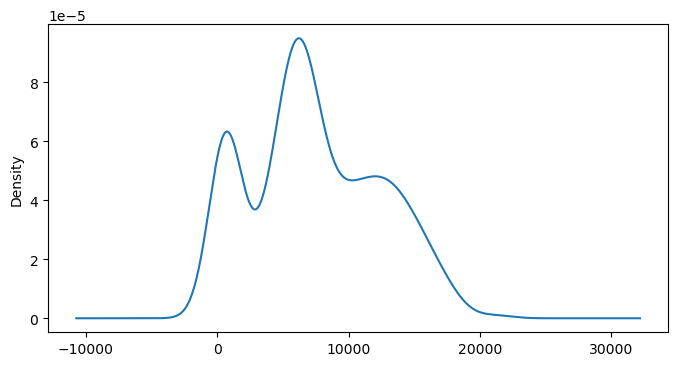

In [21]:
plt.figure(figsize=(8, 4))
claims_data["injury_claim"].plot(kind='kde')

<Axes: ylabel='Density'>

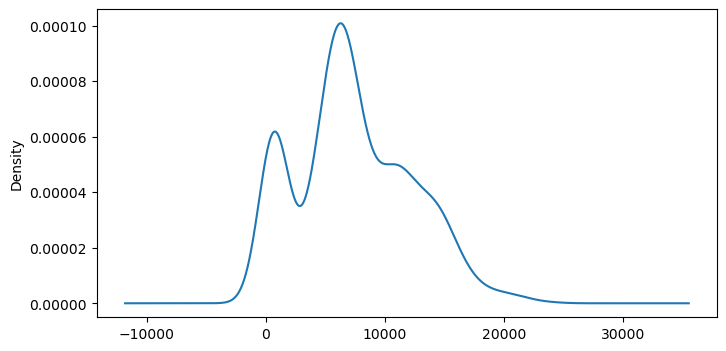

In [22]:
plt.figure(figsize=(8, 4))
claims_data["property_claim"].plot(kind='kde')

<Axes: ylabel='Density'>

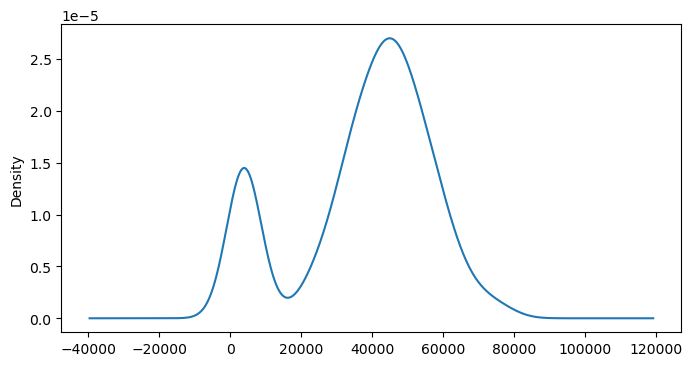

In [23]:
plt.figure(figsize=(8, 4))
claims_data["vehicle_claim"].plot(kind='kde')

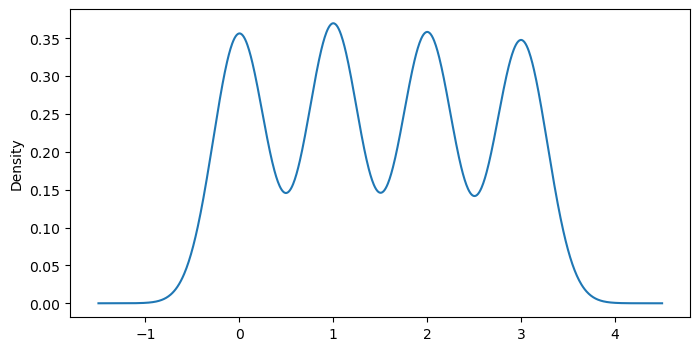

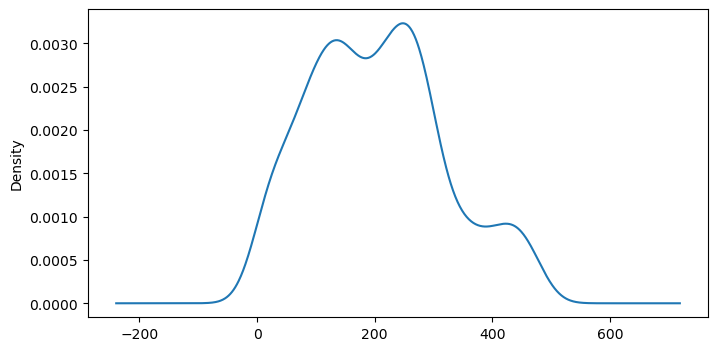

In [24]:
plt.figure(figsize=(8, 4))
claims_data["witnesses"].plot(kind='kde')
plt.show()

plt.figure(figsize=(8, 4))
claims_data["months_as_customer"].plot(kind='kde')
plt.show()

### Bi-Variate Analysis

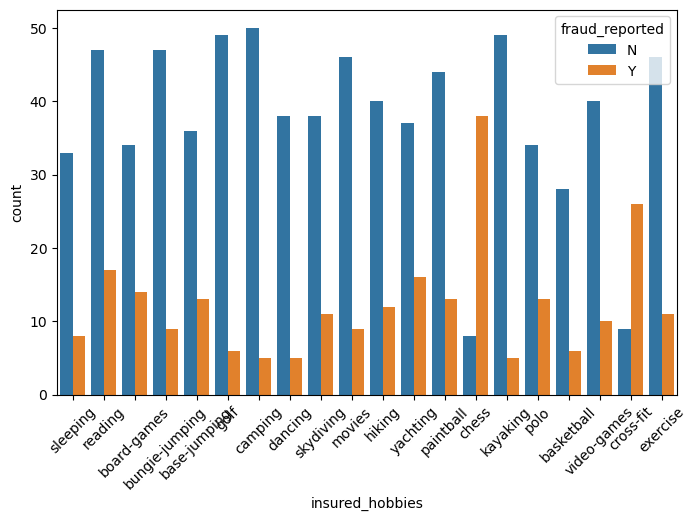

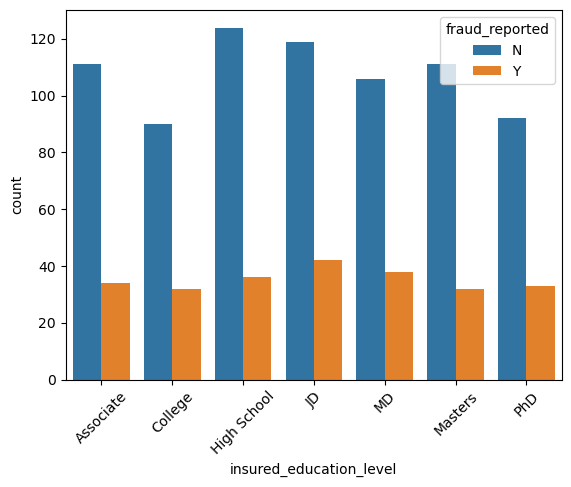

In [25]:
f, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()

# Most cases on the dataset are fradulent cases as can be observed. 

sns.countplot(x='insured_education_level',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()


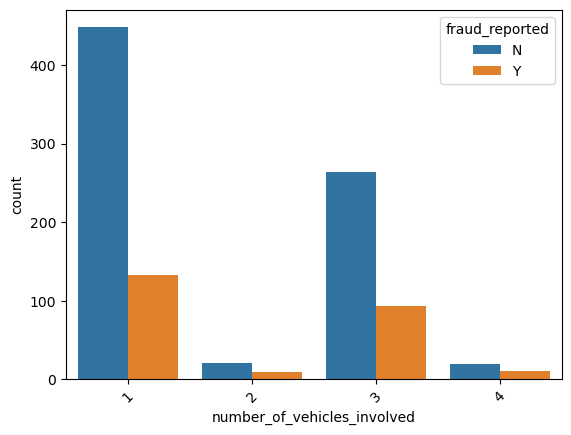

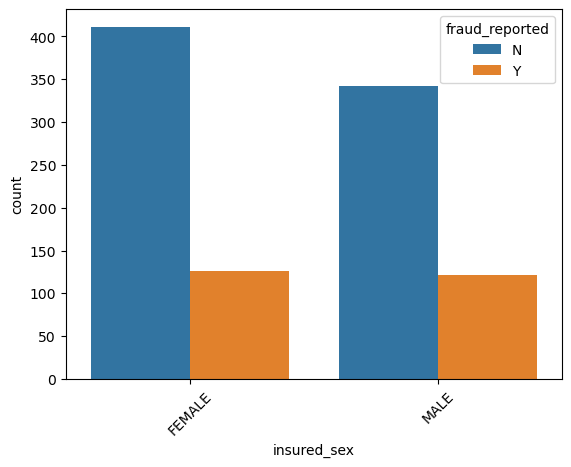

In [26]:
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Mostly one vehicle accident willl likely result result in a fraud case.

sns.countplot(x='insured_sex',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Both male and females are equally likely to commit fraud cases.

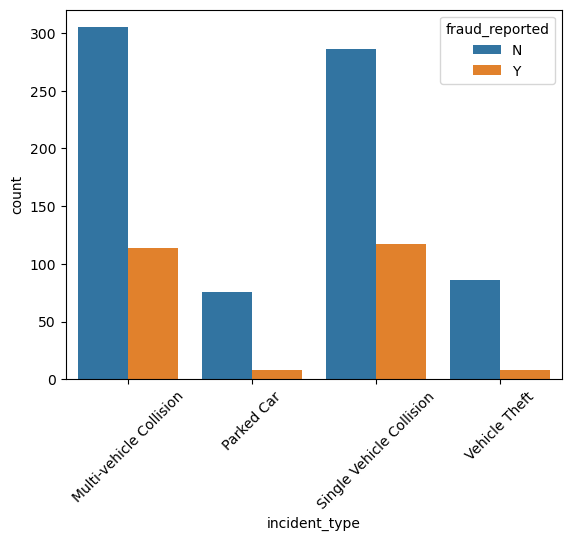

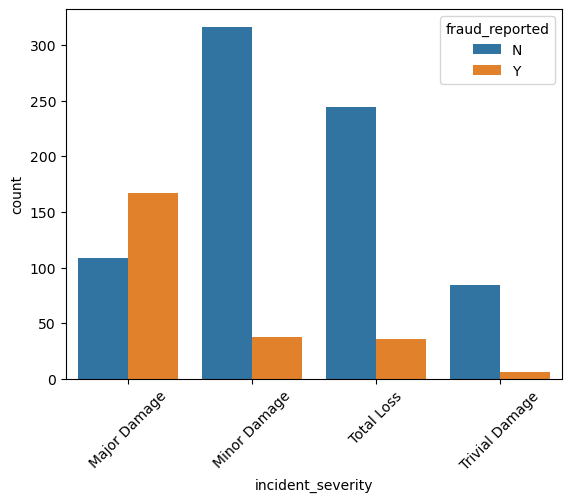

In [27]:
sns.countplot(x='incident_type',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()


sns.countplot(x='incident_severity',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()

# Major Fraud Occure on Major Incident while less occure Parked Vehicles, Single Vehicles also have traction on the Fraud

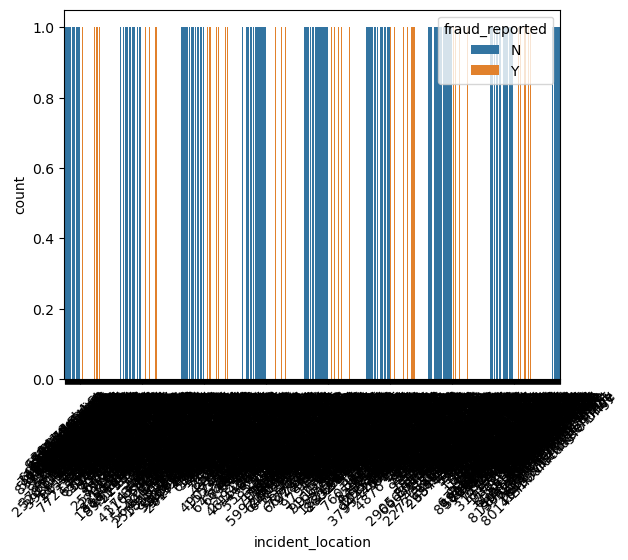

In [28]:
sns.countplot(x='incident_location',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Incident location, tells less on the claim fraud cases. 
# This column can then be removed during the data cleaning phase. 
# 

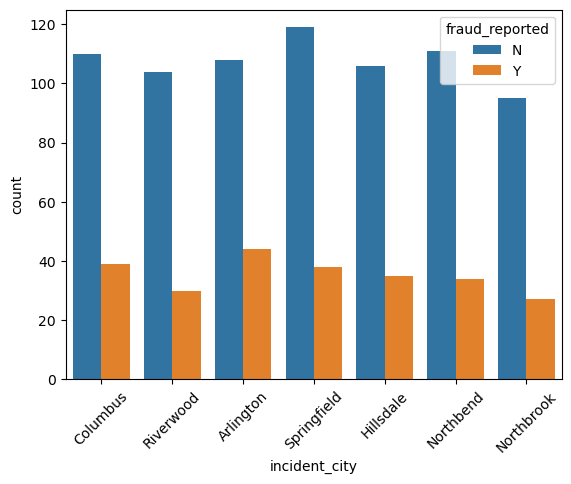

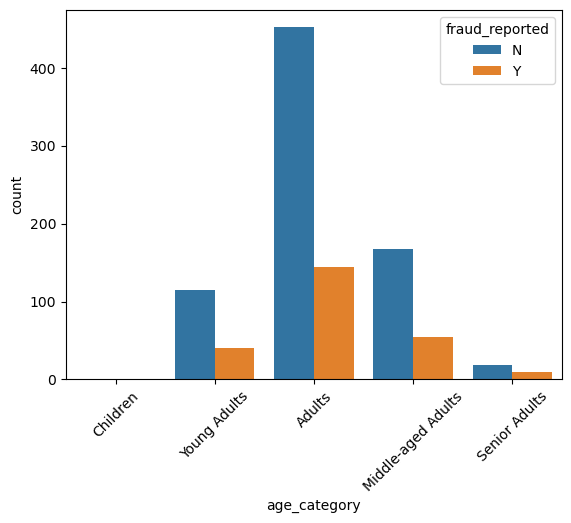

In [29]:
sns.countplot(x='incident_city',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='age_category',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Audutls are more likey to commit fradulent cases as compared to other age groups as can be observed 
# There are a few senior children more likely to perfom fradulent cases

## Fraud Cases By City
The citiy of Arlington had major fraud as compared non faud cases. while springfield was the most report  cases, it dint have major fraud cases as might have been expected. 
Northbrook has the least fraud cases of all the cities.

## Fraud Cases by agegroup.

the analysis was intre

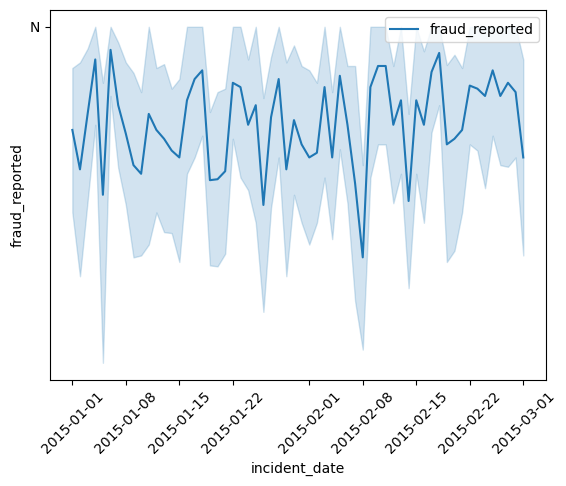

In [30]:
sns.lineplot(x='incident_date', y='fraud_reported', label='fraud_reported', data=claims_data)
plt.xticks(rotation=45)
plt.show()

# Fradulant cases over time. 
# This Analysis provides an analysis fradulent cases as registered over time. 
# There was a spark drop on the reported cases in 2015, More of it reduced in the month of march This can indicate that probably third month is the month of
# Claoims and that most of the  claims are done in the month which can as welll attract major fradulent cases.

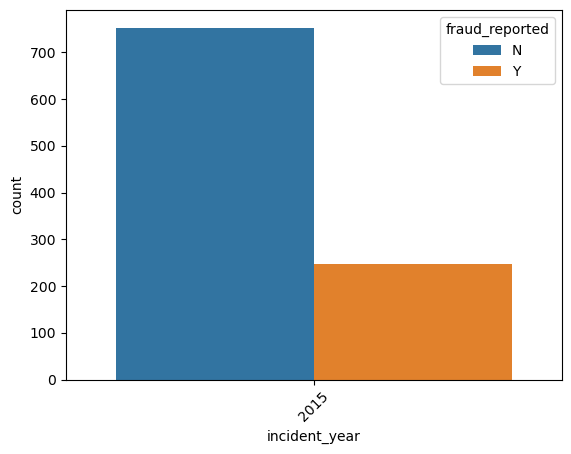

In [31]:
sns.countplot(x='incident_year',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Mmajor fraud cases hapenned in the yrear 2015. Perhaps the data available is only for 2015, or probably the cases were more skewed towards the year.

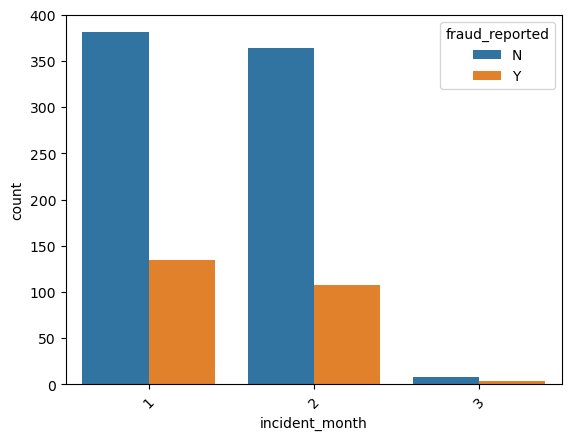

In [32]:
sns.countplot(x='incident_month',hue='fraud_reported',data=claims_data)
plt.xticks(rotation=45)
plt.show()
# Most specifically the fraud , happenned in the second month of the month. The third had a few cases . i
# It can be clearly observed that the cases are abtray to the month at which they happen. 

In [33]:
# Removing the unnecessary Columns from the dataset
to_remove = ["policy_number", "policy_bind_date", "insured_zip", "incident_location", "incident_date","_c39"]
claims_data.drop(columns=to_remove,inplace = True)
claims_data.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_sex,MALE,MALE,FEMALE,FEMALE,MALE
insured_education_level,MD,MD,PhD,PhD,Associate
insured_occupation,craft-repair,machine-op-inspct,sales,armed-forces,sales


### Machine Learning Model Development

In [34]:
claims_data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_year,incident_month,incident_day,age_category
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,13020,52080,Saab,92x,2004,Y,2015,1,25,Middle-aged Adults
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,780,3510,Mercedes,E400,2007,Y,2015,1,21,Adults
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3850,23100,Dodge,RAM,2007,N,2015,2,22,Young Adults
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,6340,50720,Chevrolet,Tahoe,2014,Y,2015,1,10,Adults
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,650,4550,Accura,RSX,2009,N,2015,2,17,Adults


In [35]:
claims_data['fraud_reported'] = np.where(claims_data['fraud_reported']=='Y',1,0).astype(int)
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   months_as_customer           1000 non-null   int64   
 1   age                          1000 non-null   int64   
 2   policy_state                 1000 non-null   category
 3   policy_csl                   1000 non-null   category
 4   policy_deductable            1000 non-null   int64   
 5   policy_annual_premium        1000 non-null   float64 
 6   umbrella_limit               1000 non-null   int64   
 7   insured_sex                  1000 non-null   category
 8   insured_education_level      1000 non-null   category
 9   insured_occupation           1000 non-null   category
 10  insured_hobbies              1000 non-null   object  
 11  insured_relationship         1000 non-null   object  
 12  capital-gains                1000 non-null   int64   
 13  capi

In [36]:
def convert_categorical_and_boolean_to_dummies(df):  
    # Create a copy of the DataFrame to avoid modifying the original  
    df_copy = df.copy()  
    # Iterate through each column in the DataFrame  
    for column in df_copy.columns:  
        # Check if the column is a categorical type (object or category)  
        if df_copy[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_copy[column]):    
            # Convert categorical column to dummy variables using one-hot encoding  
            dummies = pd.get_dummies(df_copy[column], prefix=column, drop_first=True)  
            # Drop the original categorical column and concatenate the dummies  
            df_copy = pd.concat([df_copy.drop(column, axis=1), dummies], axis=1)  
        
        # Check if the column is boolean  
        elif pd.api.types.is_bool_dtype(df_copy[column]):    
            # Convert boolean column to integers (0 and 1)  
            df_copy[column] = df_copy[column].astype(int)   
        None    
    return df_copy  
converted_df = convert_categorical_and_boolean_to_dummies(claims_data) 
converted_df = convert_categorical_and_boolean_to_dummies(converted_df)
converted_df

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6,age_category_Young Adults,age_category_Adults,age_category_Middle-aged Adults,age_category_Senior Adults
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0,0,0,0,0,0,1,0,0,0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0,1,0,0,0,0,0,1,0,0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1310.80,0,0,0,20,1,0,...,0,0,0,0,0,0,0,1,0,0
996,285,41,1000,1436.79,0,70900,0,23,1,2,...,0,0,0,0,0,0,0,1,0,0
997,130,34,500,1383.49,3000000,35100,0,4,3,2,...,0,0,0,0,0,0,0,1,0,0
998,458,62,2000,1356.92,5000000,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
X = converted_df.drop('fraud_reported',axis = 1)
y = converted_df['fraud_reported']
X.shape,y.shape

((1000, 148), (1000,))

### Machine Learning

In [38]:
# ML PKGS
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score


# Deep Learning KGS
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

In [39]:
# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape,y.shape

((1000, 148), (1000,))

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape

((700, 148), (300, 148))

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    'SVM': SVC(kernel='linear'),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
model_accuracies = {}
# Looping the models from the pipeline
for model_name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}%")

SVM Accuracy: 72.3333%
Random Forest Accuracy: 73.6667%
Logistic Regression Accuracy: 70.0000%
Gradient Boosting Accuracy: 77.0000%
K-Nearest Neighbors Accuracy: 66.3333%


In [44]:
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix  

# Create dictionaries to store precision, recall, F1 score, and accuracy of each model  
model_precision = {}  
model_recall = {}  
model_f1_score = {}  # New dictionary for F1 scores  
model_accuracy = {}  
results = {}  

# Create pipelines for each model and evaluate  
for model_name, model in models.items():  
    pipeline = Pipeline([  
        ('scaler', StandardScaler()),  
        ('model', model)  
    ])  
    
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)  
    
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate F1 score  
    accuracy = accuracy_score(y_test, y_pred)  
    conf_matrix = confusion_matrix(y_test, y_pred)  
    
    model_precision[model_name] = precision  
    model_recall[model_name] = recall  
    model_f1_score[model_name] = f1  # Store F1 score  
    model_accuracy[model_name] = accuracy  
    results[model_name] = {  
        'accuracy': accuracy,  
        'confusion_matrix': conf_matrix,  
        'precision': precision,  
        'recall': recall,  
        'f1_score': f1  # Add F1 score to results  
    }  
    
    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")  

# Optional: If you want to see the final scores  
print("\nFinal Scores:")  
for model_name in models.keys():  
    print(f"{model_name}: Precision: {model_precision[model_name]:.4f}, Recall: {model_recall[model_name]:.4f}, F1 Score: {model_f1_score[model_name]:.4f}, Accuracy: {model_accuracy[model_name]:.4f}")

SVM - Precision: 0.7137, Recall: 0.7233, F1 Score: 0.7179, Accuracy: 0.7233
Random Forest - Precision: 0.7278, Recall: 0.7467, F1 Score: 0.6700, Accuracy: 0.7467
Logistic Regression - Precision: 0.6859, Recall: 0.7000, F1 Score: 0.6918, Accuracy: 0.7000
Gradient Boosting - Precision: 0.7526, Recall: 0.7667, F1 Score: 0.7565, Accuracy: 0.7667
K-Nearest Neighbors - Precision: 0.5786, Recall: 0.6633, F1 Score: 0.6096, Accuracy: 0.6633

Final Scores:
SVM: Precision: 0.7137, Recall: 0.7233, F1 Score: 0.7179, Accuracy: 0.7233
Random Forest: Precision: 0.7278, Recall: 0.7467, F1 Score: 0.6700, Accuracy: 0.7467
Logistic Regression: Precision: 0.6859, Recall: 0.7000, F1 Score: 0.6918, Accuracy: 0.7000
Gradient Boosting: Precision: 0.7526, Recall: 0.7667, F1 Score: 0.7565, Accuracy: 0.7667
K-Nearest Neighbors: Precision: 0.5786, Recall: 0.6633, F1 Score: 0.6096, Accuracy: 0.6633


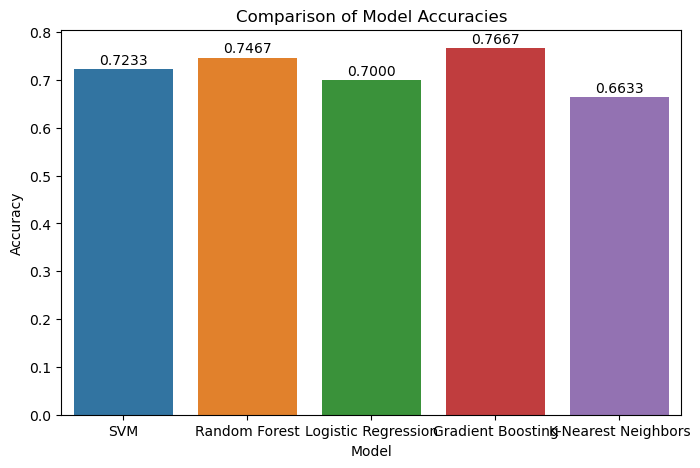

In [45]:
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=list(results.keys()), y=[result['accuracy'] for result in results.values()])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Add annotations to the bar plot
for idx, result in enumerate(results.values()):
    barplot.text(idx, result['accuracy'] + 0.01, f'{result["accuracy"]:.4f}', ha='center', color='black')
plt.show()

In [46]:
result

{'accuracy': 0.6633333333333333,
 'confusion_matrix': array([[193,  27],
        [ 74,   6]], dtype=int64),
 'precision': 0.5785722392463966,
 'recall': 0.6633333333333333,
 'f1_score': 0.6095643061789416}

In [48]:
import pickle  
# Create dictionaries to store precision, recall, F1 score, and accuracy of each model  
model_precision = {}  
model_recall = {}  
model_f1_score = {}  
model_accuracy = {}  
results = {}  

best_model_name = None  
best_model_score = -1  # Initialize to a low value  
best_model = None  

# Create pipelines for each model and evaluate  
for model_name, model in models.items():  
    pipeline = Pipeline([  
        ('scaler', StandardScaler()),  
        ('model', model)  
    ])  
    
    pipeline.fit(X_train, y_train)  
    y_pred = pipeline.predict(X_test)  
    
    precision = precision_score(y_test, y_pred, average='weighted')  
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    accuracy = accuracy_score(y_test, y_pred)  
    conf_matrix = confusion_matrix(y_test, y_pred)  
    
    model_precision[model_name] = precision  
    model_recall[model_name] = recall  
    model_f1_score[model_name] = f1  
    model_accuracy[model_name] = accuracy  
    results[model_name] = {  
        'accuracy': accuracy,  
        'confusion_matrix': conf_matrix,  
        'precision': precision,  
        'recall': recall,  
        'f1_score': f1  
    }  
    
    print(f"{model_name} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")  
    
    # Update the best model based on accuracy or F1 score  
    if accuracy > best_model_score:  # Change this to f1 if you want to use F1 score  
        best_model_score = accuracy  
        best_model_name = model_name  
        best_model = pipeline  # Save the pipeline as the best model  

# Save the best model using pickle  
if best_model is not None:  
    with open('best_model.pkl', 'wb') as f:  
        pickle.dump(best_model, f)  
    print(f"\nBest model '{best_model_name}' saved to 'best_model.pkl'.")  

# Optional: If you want to see the final scores  
print("\nFinal Scores:")  
for model_name in models.keys():  
    print(f"{model_name}: Precision: {model_precision[model_name]:.4f}, Recall: {model_recall[model_name]:.4f}, F1 Score: {model_f1_score[model_name]:.4f}, Accuracy: {model_accuracy[model_name]:.4f}")

SVM - Precision: 0.7137, Recall: 0.7233, F1 Score: 0.7179, Accuracy: 0.7233
Random Forest - Precision: 0.6782, Recall: 0.7333, F1 Score: 0.6526, Accuracy: 0.7333
Logistic Regression - Precision: 0.6859, Recall: 0.7000, F1 Score: 0.6918, Accuracy: 0.7000
Gradient Boosting - Precision: 0.7546, Recall: 0.7700, F1 Score: 0.7579, Accuracy: 0.7700
K-Nearest Neighbors - Precision: 0.5786, Recall: 0.6633, F1 Score: 0.6096, Accuracy: 0.6633

Best model 'Gradient Boosting' saved to 'best_model.pkl'.

Final Scores:
SVM: Precision: 0.7137, Recall: 0.7233, F1 Score: 0.7179, Accuracy: 0.7233
Random Forest: Precision: 0.6782, Recall: 0.7333, F1 Score: 0.6526, Accuracy: 0.7333
Logistic Regression: Precision: 0.6859, Recall: 0.7000, F1 Score: 0.6918, Accuracy: 0.7000
Gradient Boosting: Precision: 0.7546, Recall: 0.7700, F1 Score: 0.7579, Accuracy: 0.7700
K-Nearest Neighbors: Precision: 0.5786, Recall: 0.6633, F1 Score: 0.6096, Accuracy: 0.6633
